In [ ]:
---
title: "Fraud Detection in Bank Transaztions"
author: "Darwhin Gomez"
date: "`r Sys.Date()`"  #
output:
  pdf_document:
    toc: true
    toc_depth: 4
---


# Project Proposal: Fraud Detection in Bank Transactions

## 2. **Research Question**
- **Null Hypothesis (H₀):**  
  *"Anomaly detection techniques, specifically  an isolation-forrest model, does not significantly identify outliers in transaction data that correspond to fraudulent activities."*

- **Alternative Hypothesis (H₁):**  
  *"Anomaly detection techniques, specifically an isolation-forrest model, can effectively identify outliers in transaction data that correspond to fraudulent activities."*


## 2. **Justification**
Fraud detection remains a critical challenge in the financial industry. As fraudulent activities can involve abnormal transaction behaviors, detecting outliers or anomalies in large transaction datasets is key to identifying potential fraud. This project uses unsupervised learning techniques such as  **anomaly detection** to flag suspicious transactions based on transaction data. 



## 3. **Data Source**
https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data

The dataset, **bank_transaction_data_2.csv**, contains transaction records for multiple customer accounts. The dataset includes the following features:

- **TransactionID**: Unique alphanumeric identifier for each transaction.
- **AccountID**: Unique identifier for each account, with multiple transactions per account.
- **TransactionAmount**: Monetary value of each transaction.
- **TransactionDate**: Timestamp of each transaction.
- **TransactionType**: Categorical field indicating 'Credit' or 'Debit' transactions.
- **Location**: Geographic location of the transaction, represented by U.S. city names.
- **DeviceID**: Alphanumeric identifier for devices used to perform the transaction.
- **IP Address**: IPv4 address associated with the transaction.
- **MerchantID**: Unique identifier for merchants.
- **AccountBalance**: Balance in the account post-transaction.
- **PreviousTransactionDate**: Timestamp of the last transaction for the account.
- **Channel**: Channel through which the transaction was performed (e.g., Online, ATM, Branch).
- **CustomerAge**: Age of the account holder.
- **CustomerOccupation**: Occupation of the account holder (e.g., Doctor, Engineer, Student, Retired).
- **TransactionDuration**: Duration of the transaction in seconds.
- **LoginAttempts**: Number of login attempts before the transaction, with higher values indicating potential anomalies.



## 4. **Tools and Libraries**
- **Pandas**: For data manipulation and cleaning.
- **NumPy**: For numerical operations.
- **Matplotlib** and **Seaborn**: For data visualization (distributions, scatter plots, box plots, etc.).
- **Scikit-Learn**:
  - **Isolation Forest**: For unsupervised anomaly detection.
  - **StandardScaler**: For feature scaling and normalization.
- **Datetime**: For handling and extracting features from the `TransactionDate` and `PreviousTransactionDate` columns.





## 5. **Proposed Methodology**

### **Data Preprocessing**
- **Handle missing values**: Ensure no missing values are present (if any, apply appropriate imputation or removal).
- **Categorical feature encoding**: Convert categorical variables (e.g., `TransactionType`, `Location`, `Channel`) into numerical values via **One-Hot Encoding** or **Label Encoding**.
- **Datetime feature extraction**: Convert `TransactionDate` and `PreviousTransactionDate` into `datetime` format, and extract useful features such as the transaction hour, day, and time difference between consecutive transactions.
- **Standardize numerical features**: Normalize or standardize continuous variables like `TransactionAmount`, `AccountBalance`, and `TransactionDuration` to ensure consistency across the models.

### **Modeling**
- **Isolation Forest**: 
  - Train an **Isolation Forest** model to detect outliers in the transaction data, flagging unusual transactions based on their deviation from normal patterns.
  - Fine-tune model parameters (e.g., contamination level) to improve anomaly detection based on observed patterns.


### **Evaluation**
- **Fraud Flagging**: Transactions identified as outliers by the Isolation Forest model will be flagged as potential fraud.
  
- **Visual Inspection**: Use scatter plots and boxplots to visualize flagged anomalies, validating if they align with typical fraud indicators (e.g., high transaction amounts, multiple login attempts).
  
- **Transaction Patterns**: Analyze patterns of flagged transactions, such as unusual transaction amounts or rapid transaction frequency, to assess the model's ability to detect suspicious behaviors.



## 6.  **Exploratory Data Analysis**
The Following are summary statistics and some exploratory plots of some variables of interest just to visulaize some of the data, eg. distrubutions and box plots to recognize outliers. The code will be hidden but avaiable through this [link on GitHub](https://github.com/DW8888/Data602/blob/main/Bank%20Transaction%20Fraud/Darwhin_GomezPPEDA.py)


Dataset Preview:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor     

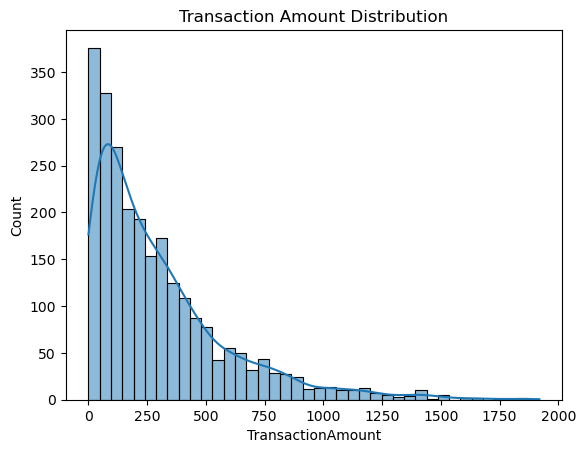

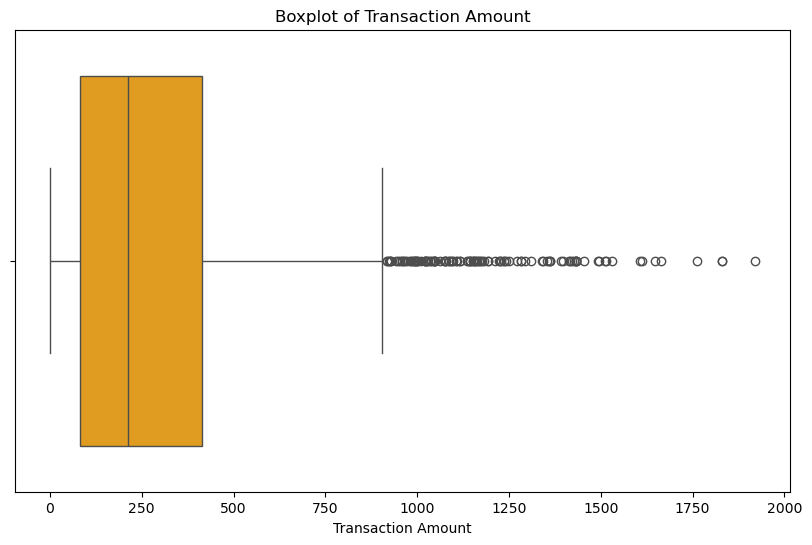

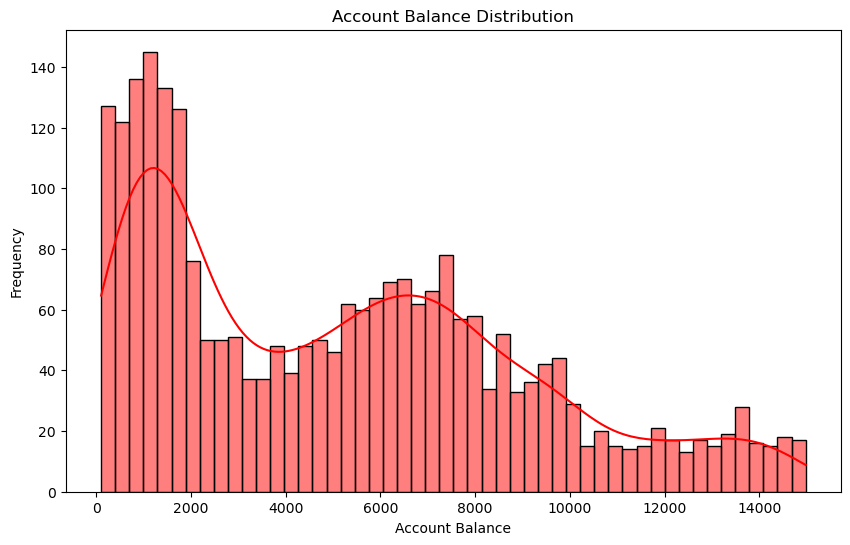

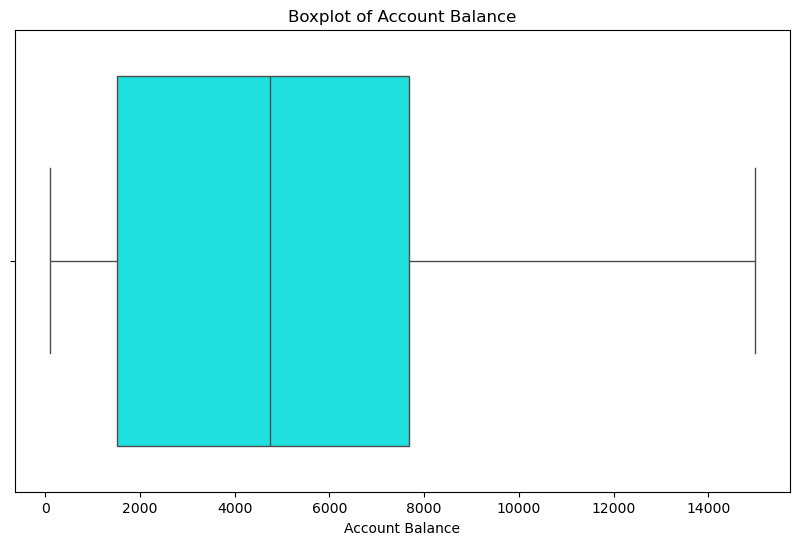

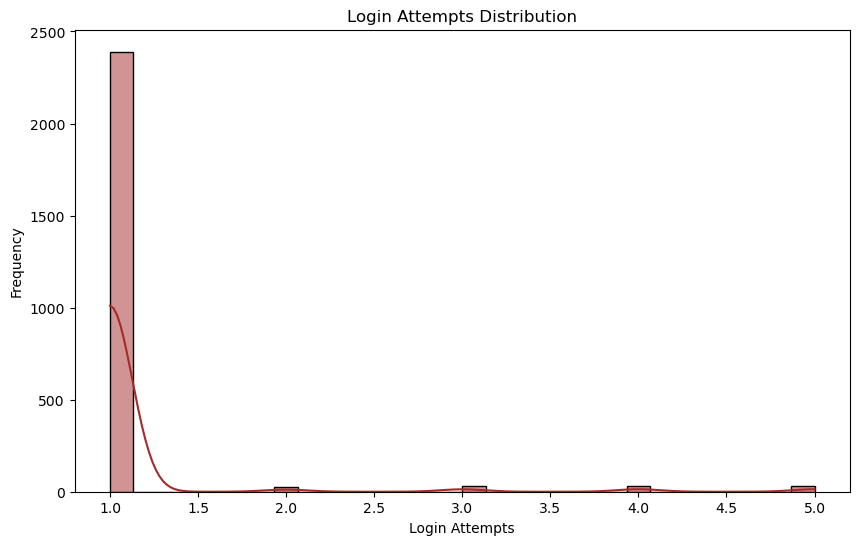

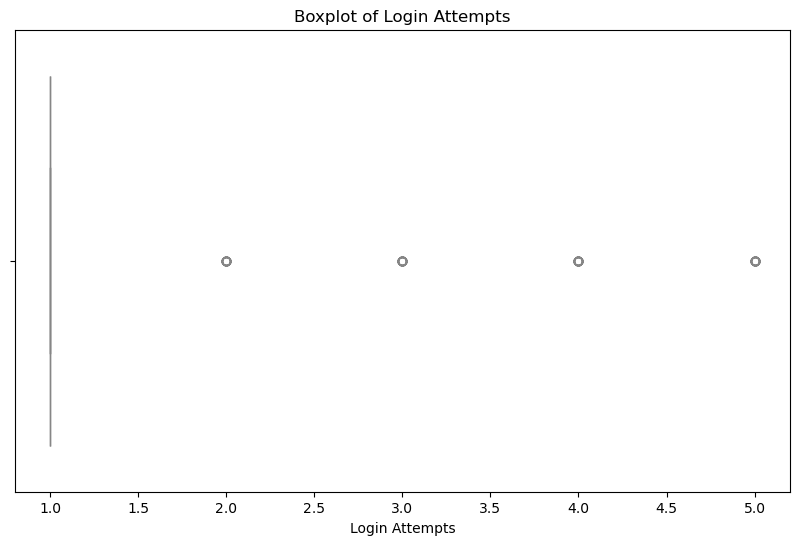

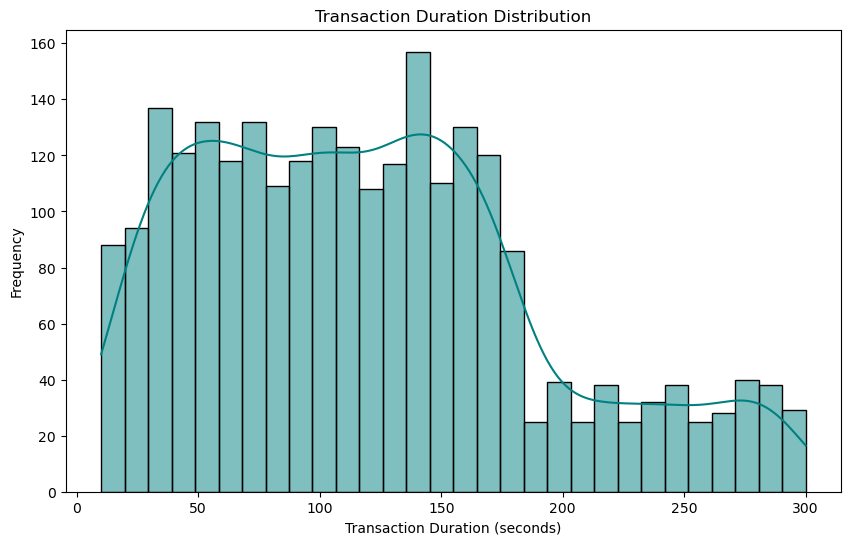

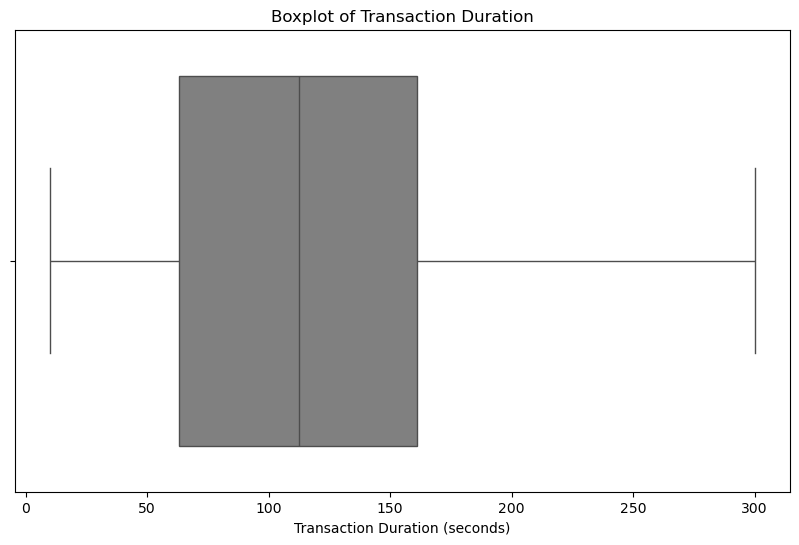

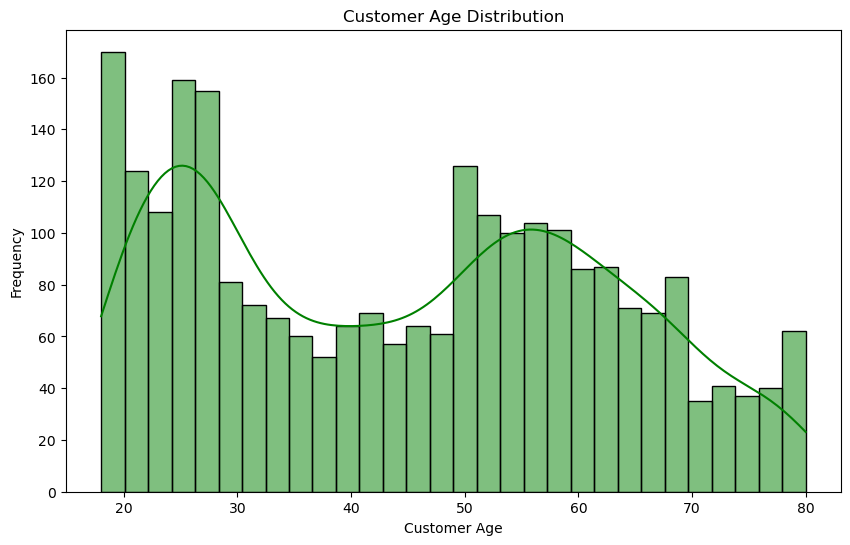

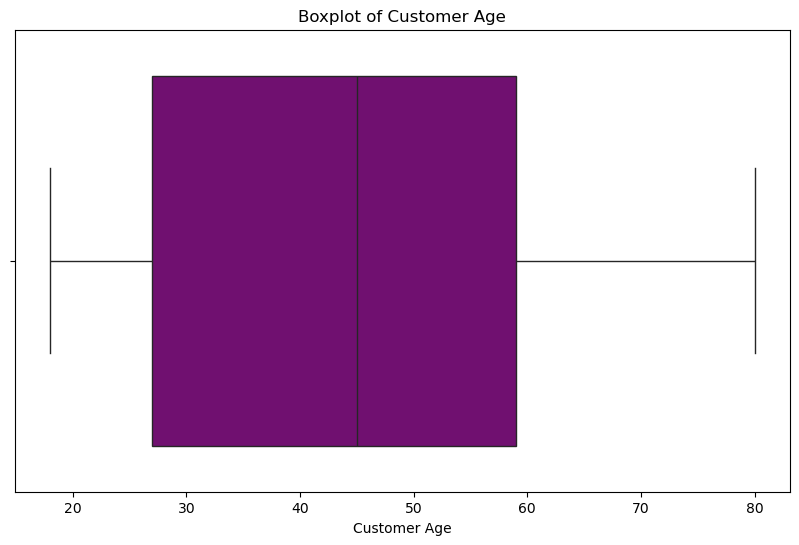

In [1]:

import pandas as pd  # For data manipulation and cleaning 
import numpy as np   # For numerical operations )


import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns          # For advanced statistical plots and better aesthetics


from sklearn.ensemble import IsolationForest  # For anomaly detection 
from sklearn.preprocessing import StandardScaler  # For standardizing features 


import datetime  # For handling and manipulating datetime objects 


import warnings
warnings.filterwarnings('ignore')   

# Load the dataset with a meaningful variable name
bank_trans_data = pd.read_csv("bank_transactions_data_2.csv")

# Display the first few rows of the dataset to understand its structure
print("Dataset Preview:")
print(bank_trans_data.head())


# Check the basic info to understand data types and identify any missing values
print("\nDataset Information:")
print(bank_trans_data.info())


# Display summary statistics to get an overview of the data distributions
print("\nSummary Statistics:")
print(bank_trans_data.describe())



# Check for any missing values in the dataset
missing_values = bank_trans_data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])


unique_counts = bank_trans_data.nunique()
print("Unique Counts for Each Column:")
print(unique_counts)
# Check the data types of all columns
print(bank_trans_data.dtypes)

# Define columns to exclude from categorical analysis
excluded_cols = ['IP Address','TransactionID', 'AccountID', 'MerchantID', 'TransactionDate', 'DeviceID', 'PreviousTransactionDate']

# Select categorical columns, excluding the identifier-like columns
categorical_cols = bank_trans_data.select_dtypes(include=['object']).columns.difference(excluded_cols)

# Display value counts for each remaining categorical column
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(bank_trans_data[col].value_counts())



# Initial Visualization of Transaction Amount Distribution
sns.histplot(bank_trans_data['TransactionAmount'], kde=True)
plt.title('Transaction Amount Distribution')
plt.show()


# Boxplot to detect outliers in Transaction Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=bank_trans_data['TransactionAmount'], color='orange')
plt.title('Boxplot of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.show()
#  **Account Balance**
plt.figure(figsize=(10, 6))
sns.histplot(bank_trans_data['AccountBalance'], kde=True, color='red', bins=50)
plt.title('Account Balance Distribution')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()


# Boxplot for Account Balance
plt.figure(figsize=(10, 6))
sns.boxplot(x=bank_trans_data['AccountBalance'], color='cyan')
plt.title('Boxplot of Account Balance')
plt.xlabel('Account Balance')
plt.show()


# 5. **Login Attempts**
plt.figure(figsize=(10, 6))
sns.histplot(bank_trans_data['LoginAttempts'], kde=True, color='brown', bins=30)
plt.title('Login Attempts Distribution')
plt.xlabel('Login Attempts')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Login Attempts
plt.figure(figsize=(10, 6))
sns.boxplot(x=bank_trans_data['LoginAttempts'], color='pink')
plt.title('Boxplot of Login Attempts')
plt.xlabel('Login Attempts')
plt.show()


# 6. **Transaction Duration**
plt.figure(figsize=(10, 6))
sns.histplot(bank_trans_data['TransactionDuration'], kde=True, color='teal', bins=30)
plt.title('Transaction Duration Distribution')
plt.xlabel('Transaction Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


# Boxplot for Transaction Duration
plt.figure(figsize=(10, 6))
sns.boxplot(x=bank_trans_data['TransactionDuration'], color='grey')
plt.title('Boxplot of Transaction Duration')
plt.xlabel('Transaction Duration (seconds)')
plt.show()
# 3. **Customer Age**
plt.figure(figsize=(10, 6))
sns.histplot(bank_trans_data['CustomerAge'], kde=True, color='green', bins=30)
plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()


# Boxplot for Customer Age
plt.figure(figsize=(10, 6))
sns.boxplot(x=bank_trans_data['CustomerAge'], color='purple')
plt.title('Boxplot of Customer Age')
plt.xlabel('Customer Age')
plt.show()